In [33]:
import numpy as np
import matplotlib.pyplot as plt
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from scipy.optimize import root
from scipy.integrate import solve_ivp
#from fitness_funs_non_dim import *
import group_w_pop_funs as grp
import equilibria_funs as eq
import sim_graph_funs as sim
from sim_graph_funs import N1lab, N2lab, Plab, mean_x_lab, Tlab
import bif_diagram_funs as bif
from local_stability_funs import fun_Jac, classify_stability
figureops = dict(bbox_inches = 'tight', dpi = 600)
colors_x = ['k', 'b', 'r', 'm']
bif_sim_fig_path = final_fig_path + "/BifurcationSimulations/"

# Simulate from Bifurcation Diagrams

Simulates the system for different regions from the bifurcation graphs

# Functions

In [34]:
def get_plot_input(params, t_f = 1000, initial_points = None):
    '''
    initial_points is either none (so generates initial points) 
    or a list of up to 4 points, each of form [N1,N2, g(1), g(2), ..., g(xm)]
    '''
    if type(initial_points) != np.ndarray: # so it's None or some invalid entry
        print("generating initial points")
        initial_points = bif.get_initial_points(4,**params)
    trajectories = []
    for i, init_state in enumerate(initial_points):
        #out2 = solve_ivp(grp.full_model, [0, t_f], init_state, 
        #                 method = "LSODA", args = (True, params))
        # results  = sim.get_results(out2, x_max) # T, N1, N2, P, g_of_x_vec, mean_x
        results = grp.bounded_ivp(init_state, params)
        trajectories.append(results)
    return trajectories
def plot_with_arrow(ax, x,y,i, label, start_ind):
    l = ax.plot(x,y,colors_x[i], label = label)
    sim.add_arrow(l[0], start_ind = start_ind)      

def make_plots(params, t_f =1000, 
               grp_size1 = 2, grp_size2 = 3, start_inds = [50,50,50,50],
              initial_points = None):
    '''
    initial points: list of initial points of form [N1, N2, g(1), g(2), ..., g(x_max)]
    params: params dictionary
    t_f: final time point for solve_ivp simulation
    grp_size1: group size on y axis of ax_g2
    grp_size2: group size for y axis of ax_g3
    start_inds: start index for arrow on plots in ax1, axN, ax_g2, ax_g3
    '''

        
    fig1, ax1 = plt.subplots(1,1) # N1 vs mean_x
    figN, axN = plt.subplots(1,1) # N1 vs N2
    fig_g2, ax_g2 = plt.subplots(1,1) #g(1) vs g(2)
    fig_g3, ax_g3 = plt.subplots(1,1) #g(1) vs g(3)
    
    trajectories = get_plot_input(params, t_f = t_f, initial_points = initial_points)
    
    for i, traj in enumerate(trajectories):
        T, N1, N2, P, g_of_x_vec, mean_x = traj
        if np.any(np.isnan(mean_x)):
            print("oh no! mean x is nan")
        elif  np.any(mean_x<0):
            print("oh no! mean x is negative")
            print("i=%d"%i)
        # check 
        label = "Initial State %d"%i
        plot_with_arrow(ax1, N1, mean_x,i,
                        label, start_inds[i])
        plot_with_arrow(axN, N1, N2, i, 
                        label, start_inds[i])
        #g(1) vs g(grp_size1)
        plot_with_arrow(ax_g2, g_of_x_vec[0], g_of_x_vec[grp_size1-1], i, 
                        label, start_inds[i])
        #g(1) vs g(grp_size2)
        plot_with_arrow(ax_g3, g_of_x_vec[0], g_of_x_vec[grp_size2 - 1], i, 
                        label, start_inds[i])

        #axN.plot(N1, N2, colors_x[i], label = label)
        #ax_g2.plot(g_of_x_vec[0], g_of_x_vec[1], colors_x[i], label = label)
        #ax_g3.plot(g_of_x_vec[0], g_of_x_vec[2], colors_x[i], label = label)

    sim.format_ax(ax1, N1lab,mean_x_lab, if_legend = True)
    sim.format_ax(axN, N1lab,N2lab, if_legend = True)
    sim.format_ax(ax_g2, 'g(1)', 'g(%d)'%grp_size1, if_legend = True)
    sim.format_ax(ax_g3, 'g(1)', 'g(%d)'%grp_size2, if_legend = True)

    return fig1, figN, fig_g2, fig_g3


In [35]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

# Type 1

In [36]:
params = params_base.copy()
trajectories = get_plot_input(params, t_f = 1000)

generating initial points


generating initial points


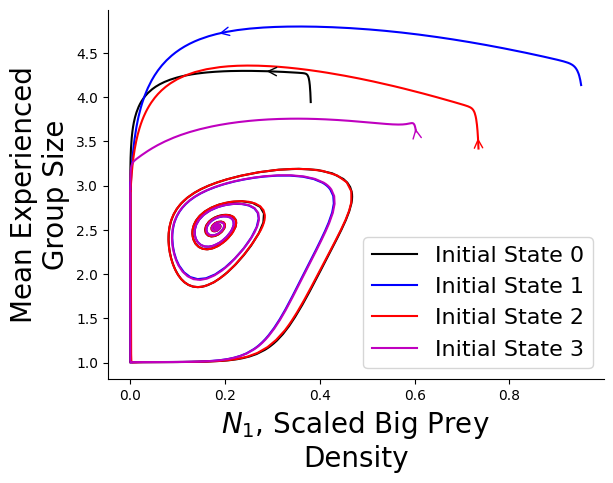

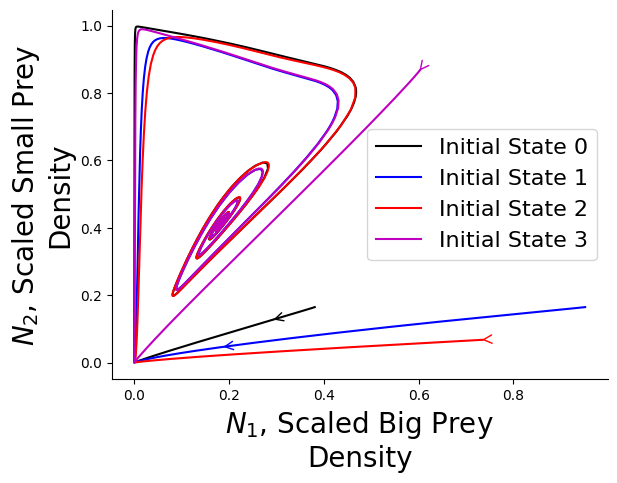

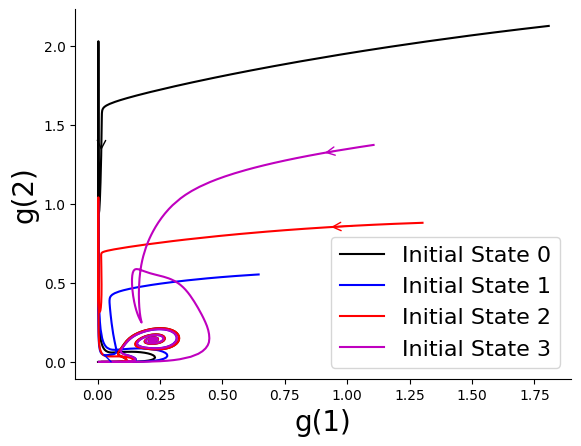

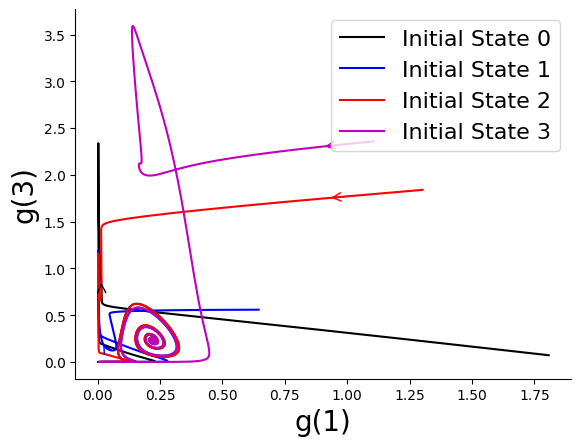

In [37]:
params = params_base.copy()
params['β1'] = 9
fig1, figN, fig_g2, fig_g3 = make_plots(params, t_f =1000, start_inds = [50,50,5,5], grp_size2 = 3)

In [38]:
fig1.savefig(bif_sim_fig_path + 'meanx_type1_b1_9.png', **figureops)
figN.savefig(bif_sim_fig_path + 'preys_type1_b1_9.png', **figureops)
fig_g2.savefig(bif_sim_fig_path + 'g2_type1_b1_9.png', **figureops)
fig_g3.savefig(bif_sim_fig_path + 'g3_type1_b1_9.png', **figureops)


# Type II, Scale = 4

In [50]:
params_base['H2'] = 1
params = bif.update_params("scale", 4, params_base)


In [53]:
initial_points = bif.get_initial_points(3,**params)
initialstate = [.3,.7,*eq.initiate_g_first_x(3,params["x_max"])]
initial_points = np.vstack((initial_points,initialstate))

In [54]:
initial_points

array([[3.80794718e-01, 6.02671899e-01, 1.83670000e-01, 2.59986668e+00,
        1.80733389e+00, 2.12713701e+00, 7.15476379e-02],
       [9.51207163e-01, 1.64458454e-01, 2.91003046e+00, 2.49900350e+00,
        6.44893941e-01, 5.53656652e-01, 5.58379484e-01],
       [7.34674002e-01, 1.64434575e-01, 9.19684306e-01, 1.57902173e+00,
        1.30151561e+00, 8.80775129e-01, 1.83944016e+00],
       [3.00000000e-01, 7.00000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e-04, 1.00000000e-04]])

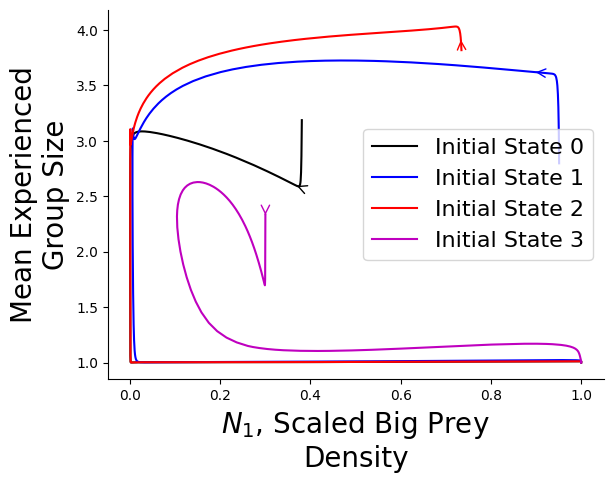

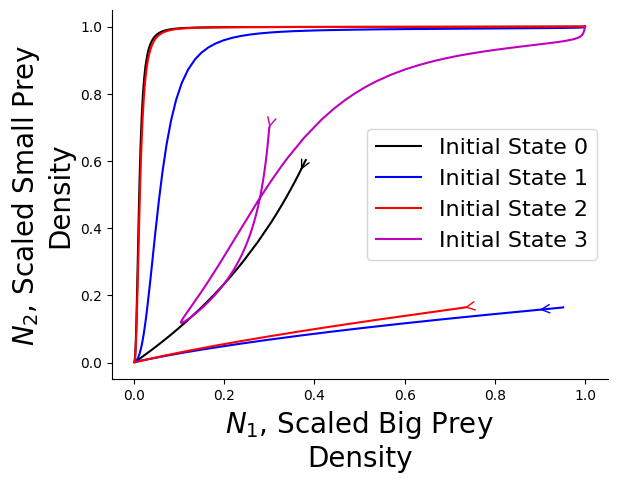

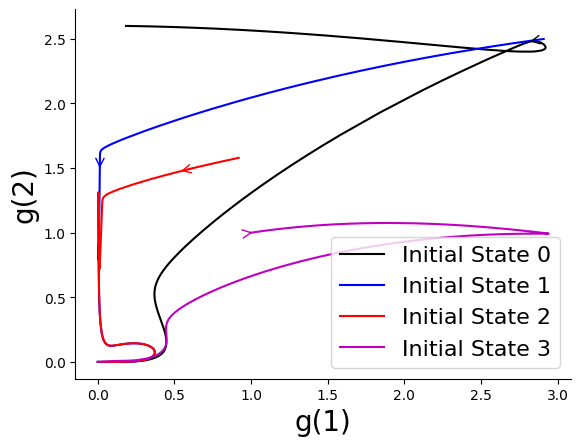

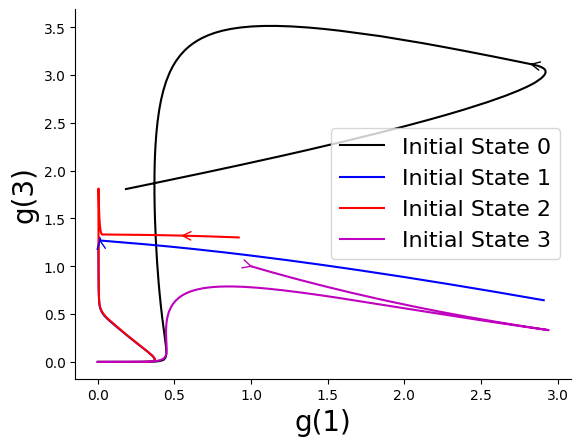

In [55]:
fig1, figN, fig_g2, fig_g3 = make_plots(
    params, t_f =1000, start_inds = [50,50,5,5], grp_size2 = 3,
initial_points = initial_points
)

# Type 2, Scale = 8

In [4]:
params_base['H2'] = 1
params = bif.update_params("scale", 8, params_base)


In [5]:
out = eq.get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = [1,1,1,0,0])
equilibrium = out.x
print(equilibrium)


perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

[-6.47972760e-01  2.49778179e-01 -1.81984246e-03 -1.44482214e-11
 -3.14037708e-07 -1.17712641e+01 -5.39584378e-01]


In [25]:
initial_points

array([[3.80794718e-01, 6.02671899e-01, 1.83670000e-01, 2.59986668e+00,
        1.80733389e+00, 2.12713701e+00, 7.15476379e-02],
       [9.51207163e-01, 1.64458454e-01, 2.91003046e+00, 2.49900350e+00,
        6.44893941e-01, 5.53656652e-01, 5.58379484e-01],
       [7.34674002e-01, 1.64434575e-01, 9.19684306e-01, 1.57902173e+00,
        1.30151561e+00, 8.80775129e-01, 1.83944016e+00],
       [7.00000000e-01, 7.00000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e-04, 1.00000000e-04]])

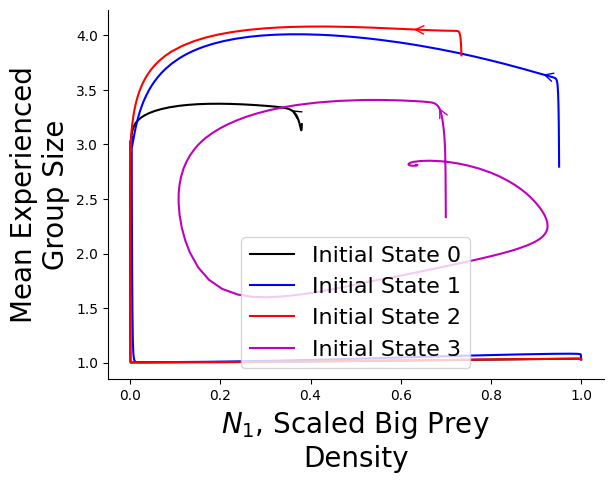

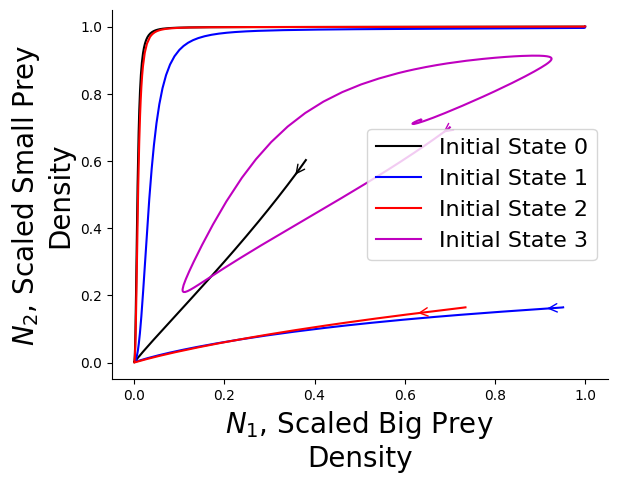

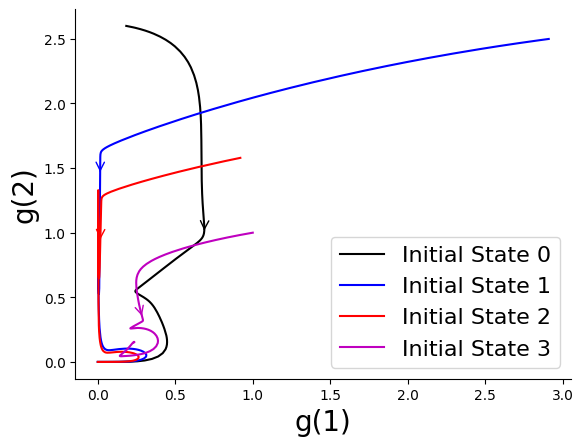

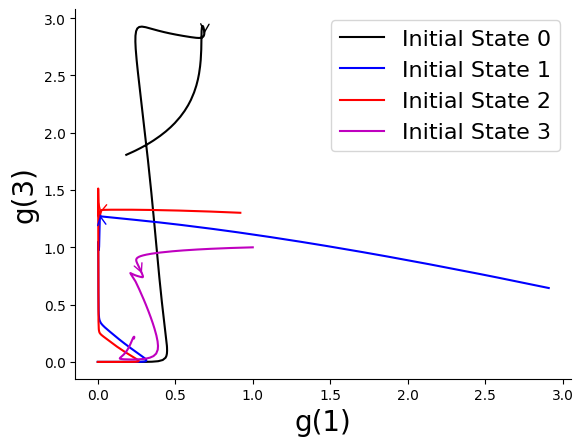

In [26]:


fig1, figN, fig_g2, fig_g3 = make_plots(params, t_f =1000, 
                                        start_inds = [50,50,50,80], grp_size2 = 3, 
                                        initial_points=initial_points)

# Type 2, Scale = 12

In [14]:
params_base['H2'] = 1
params = bif.update_params("scale", 12, params_base)


In [15]:
out = eq.get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = np.array([1,1,1,0,0]))
equilibrium = out.x
print(equilibrium)


perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

[0.42623566 0.64350447 0.20980322 0.17220604 0.30961987 0.17497661
 0.03116667]


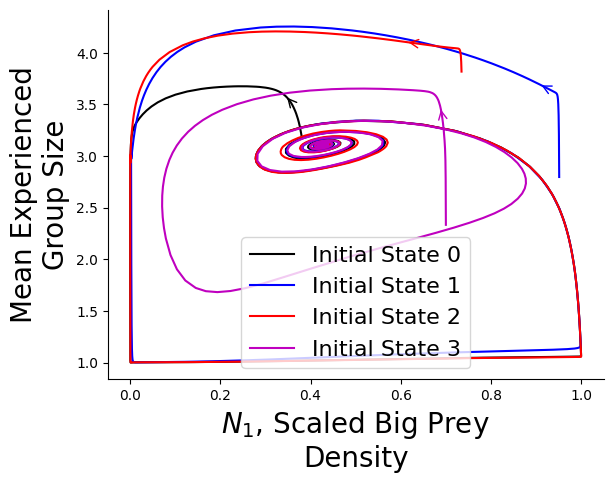

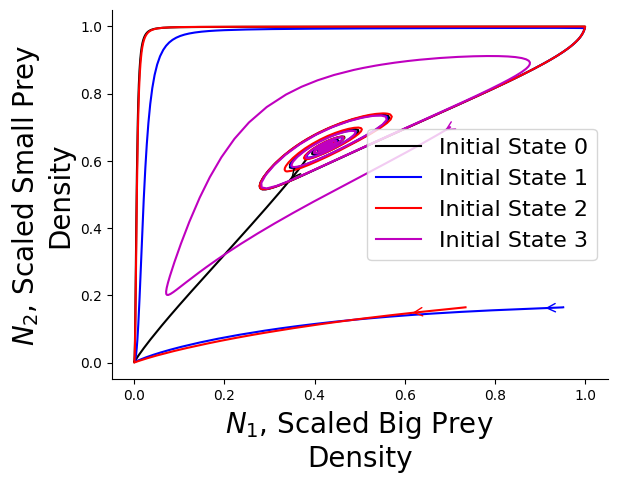

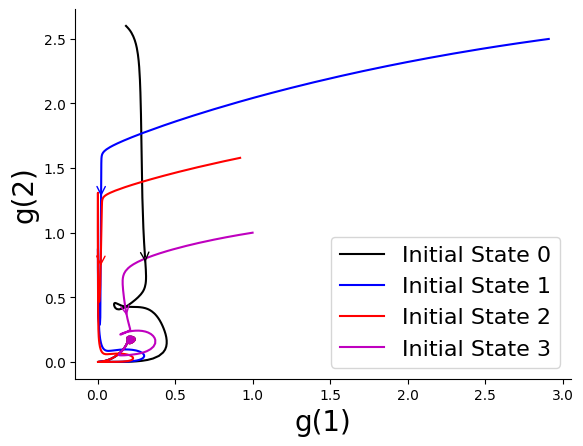

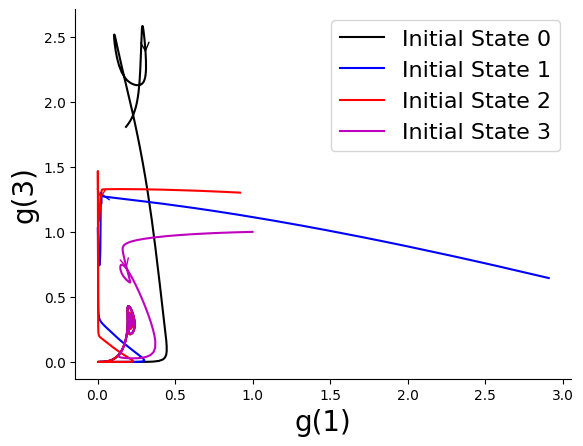

In [32]:
fig1, figN, fig_g2, fig_g3 = make_plots(params, t_f =1000, 
                                        start_inds = [50,50,50,80], grp_size2 = 3, 
                                        initial_points=initial_points)

In [48]:
trajectories = get_plot_input(params, t_f = 1000, initial_points = initial_points)
# each trajectory in form T, N1, N2, P, g_of_x_vec, mean_x

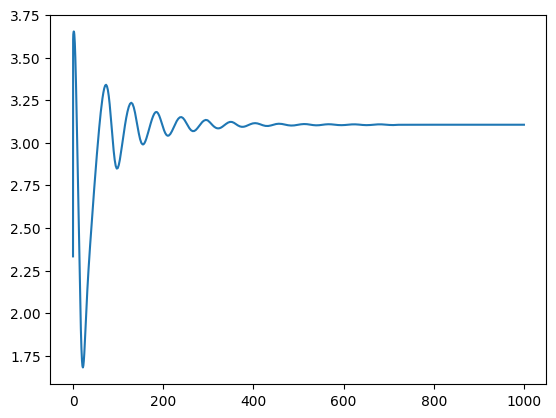

In [49]:
T, N1, N2, P, g_of_x_vec, mean_x = trajectories[3]
plt.plot(T,mean_x)

In [50]:
traj4 = [N1,N2,*g_of_x_vec]
curr = [item[-1] for item in traj4]
success, _ = eq.check_at_equilibrium2(curr[0], curr[1], curr[2:], params)

In [51]:
success

True

In [52]:
[N1,N2,*gvec] = curr
jac = fun_Jac(N1,N2,gvec,**params)

In [53]:
curr

[np.float64(0.4262356771304499),
 np.float64(0.6435044838377991),
 np.float64(0.2098032201407924),
 np.float64(0.1722060337655335),
 np.float64(0.30961985804648895),
 np.float64(0.17497659643068772),
 np.float64(0.031166667963969406)]

In [54]:
classify_stability(jac)

'Unstable'

In [25]:
perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]

In [26]:
initialstate = np.array(perturbed_pt)
t_f = 20

In [27]:
equilibrium, success, timederivatives = eq.iterate_to_eq(np.array(perturbed_pt), t_f, params)

In [28]:
equilibrium

[np.float64(0.1474796972510038),
 np.float64(0.49650092779427757),
 np.float64(0.3153575814940707),
 np.float64(0.0817495999266995),
 np.float64(0.03923489785506633),
 np.float64(0.0031630986570799),
 np.float64(5.059227953694135e-05)]

In [29]:
success

False

In [17]:
    out2 = grp.bounded_ivp(initialstate, params, t_f = t_f) 
    T, N1, N2, P, g_of_x_vec, mean_x = out2
    
    # extract results
    traj = [N1,N2,*g_of_x_vec]
    curr = [item[-1] for item in traj]

    # check if at equilibrium
    success, timederivatives = eq.check_at_equilibrium2(curr[0], curr[1], curr[2:], params)
    
    
   # return curr, success, timederivatives 

NameError: name 'initialstate' is not defined

In [39]:
timederivatives

[np.float64(2.0249893983859124e-09),
 np.float64(6.560376825115455e-10),
 np.float64(-3.175634614212969e-10),
 np.float64(1.0147945851690654e-10),
 np.float64(7.97837533886292e-10),
 np.float64(1.2731445021493815e-09),
 np.float64(4.4749568633983827e-10)]

In [26]:
eq.iterate_to_eq(perturbed_pt, 1000, params)

(array([2.33905285, 0.42622372, 0.64348215, 0.20980134, 0.17221326,
        0.3096513 , 0.17500247, 0.03117224]),
 np.False_,
 np.float64(3.105898878180319),
 [np.float64(-5.204461245321423e-06),
  np.float64(-2.7693252625943243e-06),
  np.float64(2.0770497340832396e-06),
  np.float64(5.535185374069482e-07),
  np.float64(-3.696655444100118e-07),
  np.float64(-3.372568364791613e-06),
  np.float64(8.328040212741278e-07)],
 [array([0.00000000e+00, 3.63342566e-07, 7.26685131e-07, 6.52342268e-05,
         1.29741769e-04, 1.94249310e-04, 3.76825294e-04, 5.59401278e-04,
         7.41977263e-04, 9.24553247e-04, 1.27739849e-03, 1.63024373e-03,
         1.98308897e-03, 2.33593421e-03, 2.68877945e-03, 3.40613262e-03,
         4.12348579e-03, 4.84083895e-03, 5.55819212e-03, 6.27554529e-03,
         7.63694937e-03, 8.99835346e-03, 1.03597576e-02, 1.17211616e-02,
         1.30825657e-02, 1.50015221e-02, 1.69204785e-02, 1.88394350e-02,
         2.07583914e-02, 2.26773478e-02, 2.51604349e-02, 2.764352

In [14]:
curr

[np.float64(0.4262356771304499),
 np.float64(0.6435044838377991),
 np.float64(0.2098032201407924),
 np.float64(0.1722060337655335),
 np.float64(0.30961985804648895),
 np.float64(0.17497659643068772),
 np.float64(0.031166667963969406)]